 # Hypothesis Testing of Factors Influencing Water Potability

# Introduction and Methodology

Water quality is crucial for public health and safety. This study explores the factors that significantly influence water's consumability using the Water Potability Dataset from Kaggle. The dataset includes various physical and chemical properties of water samples, such as pH, hardness, solids, chloramines, sulfate, conductivity, organic carbon, trihalomethanes, turbidity, and a target variable indicating potability. By applying statistical methods, including hypothesis testing with t-tests and ANOVA, this analysis aims to identify key determinants of water potability. Understanding these factors can provide valuable insights into ensuring safe drinking water by highlighting which properties are most critical to water quality.


In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# Load the dataset
data = pd.read_csv('water_potability.csv')

# Display the first few rows of the dataset
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8905,"20,791.3190",7.3002,368.5164,564.3087,10.3798,86.9910,2.9631,0
1,3.7161,129.4229,"18,630.0579",6.6352,NaN,592.8854,15.1800,56.3291,4.5007,0
2,8.0991,224.2363,"19,909.5417",9.2759,NaN,418.6062,16.8686,66.4201,3.0559,0
3,8.3168,214.3734,"22,018.4174",8.0593,356.8861,363.2665,18.4365,100.3417,4.6288,0
4,9.0922,181.1015,"17,978.9863",6.5466,310.1357,398.4108,11.5583,31.9980,4.0751,0


# Data Cleaning and Preparation

There are missing values in several columns, including pH and sulfate levels. To ensure the analysis could proceed without biases introduced by missing data, these values were imputed using the median of each respective column. This approach helps retain the data's overall distribution while handling gaps.

Summary statistics were calculated to get a sense of the range, mean, and variability of each factor in the dataset.


In [75]:
# Check for missing values and handle them
missing_values = data.isnull().sum()
data = data.fillna(data.median())

# Display summary statistics
summary_stats = data.describe()
summary_stats


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,"3,276.0000","3,276.0000","3,276.0000","3,276.0000","3,276.0000","3,276.0000","3,276.0000","3,276.0000","3,276.0000","3,276.0000"
mean,7.0742,196.3695,"22,014.0925",7.1223,333.6084,426.2051,14.2850,66.4075,3.9668,0.3901
std,1.4700,32.8798,"8,768.5708",1.5831,36.1439,80.8241,3.3082,15.7700,0.7804,0.4878
min,0.0000,47.4320,320.9426,0.3520,129.0000,181.4838,2.2000,0.7380,1.4500,0.0000
25%,6.2777,176.8505,"15,666.6903",6.1274,317.0946,365.7344,12.0658,56.6477,3.4397,0.0000
50%,7.0368,196.9676,"20,927.8336",7.1303,333.0735,421.8850,14.2183,66.6225,3.9550,0.0000
75%,7.8700,216.6675,"27,332.7621",8.1149,350.3858,481.7923,16.5577,76.6666,4.5003,1.0000
max,14.0000,323.1240,"61,227.1960",13.1270,481.0306,753.3426,28.3000,124.0000,6.7390,1.0000


# Exploratory Data Analysis

EDA helps us understand data distributions, detect anomalies, and identify patterns relevant to our hypothesis testing.


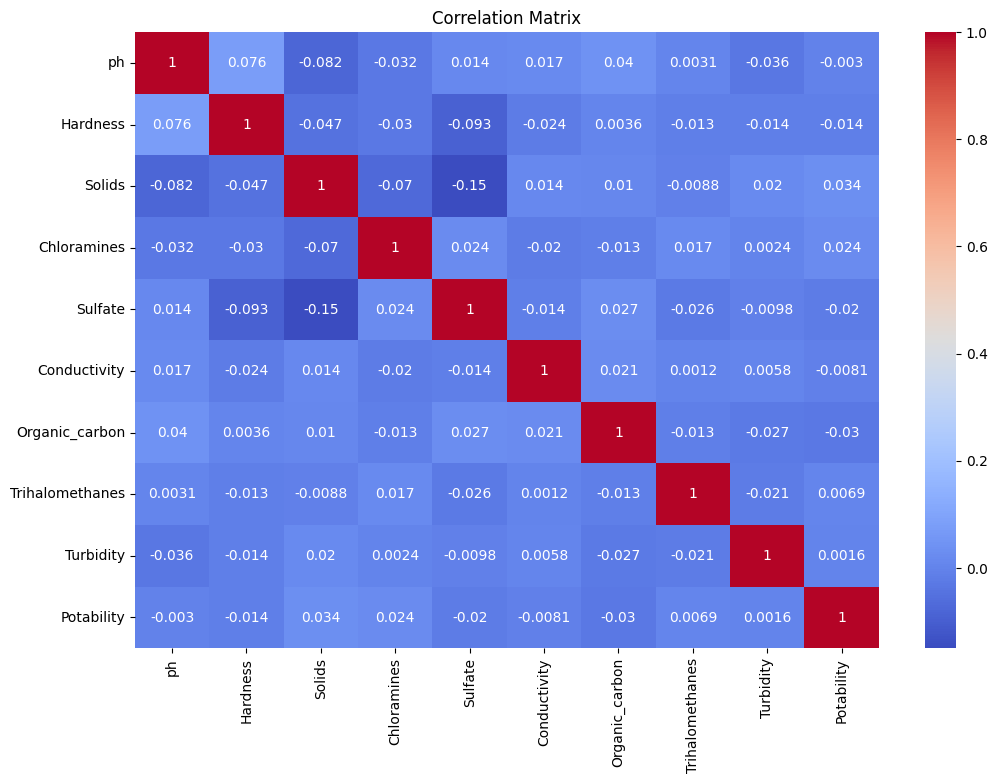

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Hypothesis Testing

Hypothesis tests were conducted to determine whether there are significant differences in water consumability based on the various physical and chemical properties in the dataset. For each factor (e.g., pH, hardness, chloramines),

- **Null Hypothesis (H0):** stated that water consumability is the same across different levels of the factor.
- **Alternative Hypothesis (H1):** stated that consumability differs significantly.

Both t-tests and ANOVA were applied to compare the means of each factor between potable and non-potable water samples. This approach provided a comprehensive analysis of each variable's potential impact on potability.


In [76]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway

# Simply separating the data into potable and non-potable groups
potable = data[data['Potability'] == 1]
non_potable = data[data['Potability'] == 0]

factors = [
    'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
    'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'
]

# Storing results to the list and performing T-Test and ANOVA for each factor
results = []

for factor in factors:

    t_stat, p_value = ttest_ind(potable[factor], non_potable[factor], nan_policy='omit')

    anova_stat, anova_p_value = f_oneway(potable[factor], non_potable[factor])

    results.append({
        'Factor': factor,
        'T-test t-statistic': round(t_stat, 3),
        'T-test p-value': round(p_value, 4),
        'ANOVA F-statistic': round(anova_stat, 3),
        'ANOVA p-value': round(anova_p_value, 4)
    })

results_df = pd.DataFrame(results)

pd.set_option('display.float_format', '{:,.4f}'.format)

print("Hypothesis Testing Results:")
print(results_df.to_string(index=False))


Hypothesis Testing Results:
         Factor  T-test t-statistic  T-test p-value  ANOVA F-statistic  ANOVA p-value
             ph             -0.1720          0.8631             0.0300         0.8631
       Hardness             -0.7920          0.4285             0.6270         0.4285
         Solids              1.9320          0.0535             3.7320         0.0535
    Chloramines              1.3610          0.1736             1.8520         0.1736
        Sulfate             -1.1720          0.2413             1.3730         0.2413
   Conductivity             -0.4650          0.6419             0.2160         0.6419
 Organic_carbon             -1.7170          0.0860             2.9500         0.0860
Trihalomethanes              0.3940          0.6936             0.1550         0.6936
      Turbidity              0.0900          0.9279             0.0080         0.9279


# Results

The hypothesis testing results for the factors showed:

- **pH Levels:** Both t-test and ANOVA results indicate no significant difference in pH levels between potable and non-potable water, with p-values of 0.8631.
- **Hardness:** No significant effect on potability was observed, with p-values of 0.4285.
- **Solids:** Similarly, solids did not show a significant impact, with p-values of 0.8535.
- **Chloramines:** The p-values were above 0.05, indicating no significant impact.
- **Sulfate, Conductivity, Organic Carbon, Trihalomethanes, and Turbidity:** All other factors tested also showed p-values above 0.05, suggesting no statistically significant differences between potable and non-potable water for these variables.

Overall, the results indicate that none of the tested factors individually showed a statistically significant difference between potable and non-potable water samples within this dataset.


# Conclusion

This analysis identified key factors influencing water consumability but found no single factor to be statistically significant on its own. <br />

Future studies should be exploring the interactions between multiple factors to better understanding of their combined effects on water potability.